In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("Billionaire Characteristics Database/richpeople.xlsx")

SyntaxError: unexpected EOF while parsing (<ipython-input-12-5a27e0704840>, line 1)

# Visualising aggregated data

In [4]:
recent = df[df['year'] == 2014]
recent = recent[['name','age','gender','industry','networthusbillion','countrycode','rank']]
recent = recent.sort_values(by='rank').head(8)
recent.head()

,name,age,gender,industry,networthusbillion,countrycode,rank
284,Bill Gates,58.0,male,Technology-Computer,76.0,USA,1
348,Carlos Slim Helu,74.0,male,Media,72.0,MEX,2
124,Amancio Ortega,77.0,male,"Retail, Restaurant",64.0,ESP,3
2491,Warren Buffett,83.0,male,Consumer,58.2,USA,4
1377,Larry Ellison,69.0,male,Technology-Computer,48.0,USA,5


In [6]:
americans = recent[recent['countrycode'] == 'USA']
americans

,name,age,gender,industry,networthusbillion,countrycode,rank
284,Bill Gates,58.0,male,Technology-Computer,76.0,USA,1
2491,Warren Buffett,83.0,male,Consumer,58.2,USA,4
1377,Larry Ellison,69.0,male,Technology-Computer,48.0,USA,5
509,David Koch,73.0,male,Diversified financial,40.0,USA,6
381,Charles Koch,78.0,male,Diversified financial,40.0,USA,6
2185,Sheldon Adelson,80.0,male,Real Estate,38.0,USA,8


In [ ]:
#value count vs groupby

#*groupby()** when you want aggregate of data - totals, categories, or you want medians
#value_counts is just for counting i

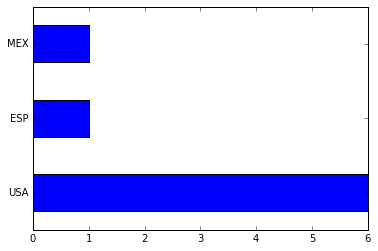

In [10]:
recent['countrycode'].value_counts().plot(kind='barh')

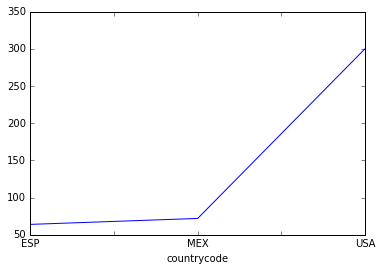

In [17]:
recent.groupby('countrycode')['networthusbillion'].sum().plot()

# (Inner) Joining Data

In [19]:
recent = df[df['year'] == 2014]
recent = recent[['name','countrycode','networthusbillion']]
recent.head()

,name,countrycode,networthusbillion
1,A. Jerrold Perenchio,USA,2.6
5,Abdulla Al Futtaim,ARE,2.5
6,Abdulla bin Ahmad Al Ghurair,ARE,4.8
8,Abdullah Al Rajhi,SAU,2.4
9,Abdulsamad Rabiu,NGA,1.2


In [20]:

# Make a list of dictionaries
country_gdp = [
   { 'country': 'USA', 'gdp': 17.418 },
   { 'country': 'DEU', 'gdp': 3.859 },
   { 'country': 'CHN', 'gdp': 10.380 },
   { 'country': 'RUS', 'gdp': 1.857 },
   { 'country': 'JPN', 'gdp': 4.616 },
   { 'country': 'BRA', 'gdp': 2.353 },
   { 'country': 'HKG', 'gdp': 0.289 },
   { 'country': 'FRA', 'gdp': 2.846 },
   { 'country': 'GBR', 'gdp': 2.945 },
   { 'country': 'IND', 'gdp': 2.049 }
]

In [21]:
gdp_df = pd.DataFrame(country_gdp)
gdp_df

,country,gdp
0,USA,17.418
1,DEU,3.859
2,CHN,10.380
3,RUS,1.857
4,JPN,4.616
5,BRA,2.353
6,HKG,0.289
7,FRA,2.846
8,GBR,2.945
9,IND,2.049


In [ ]:
#gdp_df = pd.read_csv("...")

In [22]:
gdp_df['billions'] = gdp_df['gdp'] * 1000

In [23]:
gdp_df

,country,gdp,billions
0,USA,17.418,17418.0
1,DEU,3.859,3859.0
2,CHN,10.380,10380.0
3,RUS,1.857,1857.0
4,JPN,4.616,4616.0
5,BRA,2.353,2353.0
6,HKG,0.289,289.0
7,FRA,2.846,2846.0
8,GBR,2.945,2945.0
9,IND,2.049,2049.0


In [ ]:
#No for the join

In [24]:
recent.head(2)

,name,countrycode,networthusbillion
1,A. Jerrold Perenchio,USA,2.6
5,Abdulla Al Futtaim,ARE,2.5


In [25]:
gdp_df.head(2)

,country,gdp,billions
0,USA,17.418,17418.0
1,DEU,3.859,3859.0


In [ ]:

# Matching up country code from recent to gdp_df
#.merge

In [28]:
merged = recent.merge(gdp_df, left_on = 'countrycode', right_on ='country') 
merged.head()

,name,countrycode,networthusbillion,country,gdp,billions
0,A. Jerrold Perenchio,USA,2.6,USA,17.418,17418.0
1,Abigail Johnson,USA,17.3,USA,17.418,17418.0
2,Aerin Lauder Zinterhofer,USA,1.1,USA,17.418,17418.0
3,Alan Gerry,USA,1.4,USA,17.418,17418.0
4,Alec Gores,USA,2.0,USA,17.418,17418.0


In [29]:
len(gdp_df)

10

In [30]:
recent['countrycode'].describe()

count     1653
unique      69
top        USA
freq       499
Name: countrycode, dtype: object

In [31]:
merged[merged['countrycode'] == 'SAU']

,name,countrycode,networthusbillion,country,gdp,billions


In [32]:
recent[recent['countrycode'] == 'SAU']

,name,countrycode,networthusbillion
8,Abdullah Al Rajhi,SAU,2.4
1711,Mohammad Al Amoudi,SAU,15.3
1713,Mohammed Al Issa,SAU,3.1
1902,Prince Alwaleed Bin Talal Alsaud,SAU,20.4
1903,Prince Sultan bin Mohammed bin Saud Al Kabeer,SAU,3.5
2125,Saleh Kamel,SAU,2.4
2292,Sulaiman Al Rajhi,SAU,1.9


In [ ]:
#if we do a merge it gets rid of the column. 

In [33]:
len(recent)

1653

In [34]:
len(_merged)

1130

# Left join (making sure all the columns stay there)

In [36]:
#so this will allow you to have empty non-matchin values.
left_merged = recent.merge(gdp_df, how = 'left', left_on = 'countrycode', right_on ='country') 
left_merged.head()


,name,countrycode,networthusbillion,country,gdp,billions
0,A. Jerrold Perenchio,USA,2.6,USA,17.418,17418.0
1,Abdulla Al Futtaim,ARE,2.5,NaN,NaN,NaN
2,Abdulla bin Ahmad Al Ghurair,ARE,4.8,NaN,NaN,NaN
3,Abdullah Al Rajhi,SAU,2.4,NaN,NaN,NaN
4,Abdulsamad Rabiu,NGA,1.2,NaN,NaN,NaN


In [42]:
#left_merged['billion'] != 'NaN'
left_merged['billions'].isnull()
only_people_with_gdps = left_merged[left_merged['billions'].notnull()]
only_people_with_gdps.head()

,name,countrycode,networthusbillion,country,gdp,billions
0,A. Jerrold Perenchio,USA,2.6,USA,17.418,17418.0
5,Abigail Johnson,USA,17.3,USA,17.418,17418.0
6,Abilio dos Santos Diniz,BRA,2.8,BRA,2.353,2353.0
8,Adi Godrej,IND,3.5,IND,2.049,2049.0
9,Aerin Lauder Zinterhofer,USA,1.1,USA,17.418,17418.0


# Pracitising with the NBA data, changing and manipulating data

In [48]:
nba = pd.read_csv("NBA-Census-10.14.2013.csv", encoding='mac_roman')
nba.head(2)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No


In [52]:
nba.sort_values(by='2013 $').head(4)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
44,"Stephenson, Lance",23,Pacers,G,1,"$1,005,000",77,228,3,2010,9/5/1990,Cincinnati,"New York City, NY",New York,US,Black,No
132,"Morrow, Anthony",28,Pelicans,G,3,"$1,027,424",77,210,5,2008,9/27/1985,Georgia Tech,"Charlotte, NC",North Carolina,US,Black,No
148,"White, DJ",27,Bulls,F,6,"$1,027,424",81,250,5,2008,8/31/1986,Indiana,"Tuscaloosa, AL",Alabama,US,Black,No
93,"Singler, Kyle",25,Pistons,G/F,25,"$1,045,000",80,230,1,2012,5/4/1988,Duke,"Medford, OR",Oregon,US,White,No


In [53]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 17 columns):
Name                                  528 non-null object
Age                                   528 non-null int64
Team                                  528 non-null object
POS                                   528 non-null object
#                                     528 non-null object
2013 $                                528 non-null object
Ht (In.)                              528 non-null int64
WT                                    528 non-null int64
EXP                                   528 non-null int64
1st Year                              528 non-null int64
DOB                                   528 non-null object
School                                528 non-null object
City                                  528 non-null object
State (Province, Territory, Etc..)    528 non-null object
Country                               528 non-null object
Race                          

In [56]:
million_dollar_string = "$1,000,000"

In [57]:
int(million_dollar_string)

ValueError: invalid literal for int() with base 10: '$1,000,000'

In [58]:
#million_dollar_string.strip("$")
#million_dollar_string.strip(",") (this won't work)

In [59]:
million_dollar_string.replace("0","9")

'$1,999,999'

In [60]:
million_dollar_string.replace("$"," ")

' 1,000,000'

In [61]:
million_dollar_string.replace(",", "")

'$1000000'

In [64]:
int(million_dollar_string.replace(",", "").replace("$", ""))

1000000

In [67]:
#nba['2013 $'].replace(",", "").replace("$", "") 

In [69]:
nba['2013 $'].str.replace("$", "")

0       3,250,000
1      10,105,855
2       2,652,000
3         762,195
4      11,046,000
5       1,246,680
6       5,000,000
7       5,016,960
8       3,563,600
9       6,500,000
10      3,135,000
11      5,625,313
12            n/a
13     12,868,632
14            n/a
15        792,377
16      1,750,000
17     13,701,250
18        510,000
19        884,293
20        788,872
21     21,466,718
22      1,186,459
23        884,293
24        788,872
25        788,872
26      1,082,520
27      4,469,548
28        490,180
29      1,399,507
          ...    
498    18,668,431
499     8,000,000
500       951,463
501    10,361,446
502     6,500,000
503     1,160,040
504           n/a
505       884,293
506     2,016,000
507     2,678,640
508       225,479
509       788,872
510       788,872
511     2,317,920
512     3,202,920
513       854,389
514           n/a
515       884,293
516     6,500,000
517     6,500,000
518     1,660,257
519     5,225,000
520       490,180
521       490,180
522     2,

In [70]:
nba['2013 $'].str.replace("$", "").str.replace(",", "")

0       3250000
1      10105855
2       2652000
3        762195
4      11046000
5       1246680
6       5000000
7       5016960
8       3563600
9       6500000
10      3135000
11      5625313
12          n/a
13     12868632
14          n/a
15       792377
16      1750000
17     13701250
18       510000
19       884293
20       788872
21     21466718
22      1186459
23       884293
24       788872
25       788872
26      1082520
27      4469548
28       490180
29      1399507
         ...   
498    18668431
499     8000000
500      951463
501    10361446
502     6500000
503     1160040
504         n/a
505      884293
506     2016000
507     2678640
508      225479
509      788872
510      788872
511     2317920
512     3202920
513      854389
514         n/a
515      884293
516     6500000
517     6500000
518     1660257
519     5225000
520      490180
521      490180
522     2676000
523      900000
524      788872
525      854389
526    12000000
527     2162419
Name: 2013 $, dtype: obj

In [74]:
nba['2013 $'].str.replace("$", "").str.replace(",", "").astype(int)
#this happends, because there are players with n/a in.

SyntaxError: invalid syntax (<ipython-input-74-3c3f55f0e88e>, line 1)

In [75]:
money_players = nba[nba['2013 $'] != 'n/a']
money_players['2013 $'].str.replace("$", "").str.replace(",", "").astype(int)

0       3250000
1      10105855
2       2652000
3        762195
4      11046000
5       1246680
6       5000000
7       5016960
8       3563600
9       6500000
10      3135000
11      5625313
13     12868632
15       792377
16      1750000
17     13701250
18       510000
19       884293
20       788872
21     21466718
22      1186459
23       884293
24       788872
25       788872
26      1082520
27      4469548
28       490180
29      1399507
30      1260360
31      4250000
         ...   
495      947907
497     3749602
498    18668431
499     8000000
500      951463
501    10361446
502     6500000
503     1160040
505      884293
506     2016000
507     2678640
508      225479
509      788872
510      788872
511     2317920
512     3202920
513      854389
515      884293
516     6500000
517     6500000
518     1660257
519     5225000
520      490180
521      490180
522     2676000
523      900000
524      788872
525      854389
526    12000000
527     2162419
Name: 2013 $, dtype: int

In [77]:
money_players['salary'] = money_players['2013 $'].str.replace("$", "").str.replace(",", "").astype(int)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


TypeError: hist() got multiple values for argument 'x'

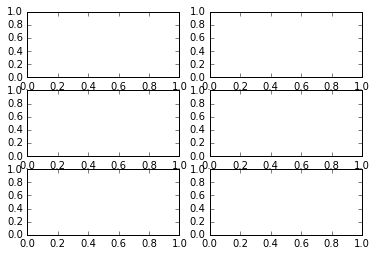

In [79]:
money_players.groupby("POS").hist(kind='bar', x='salary')

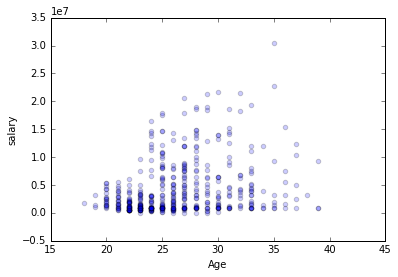

In [80]:
money_players.plot(kind='scatter', x='Age', y='salary', alpha=0.2)